In [3]:
 import numpy as np
 import cv2
 import PIL.Image as Image
 import matplotlib.pyplot as plt

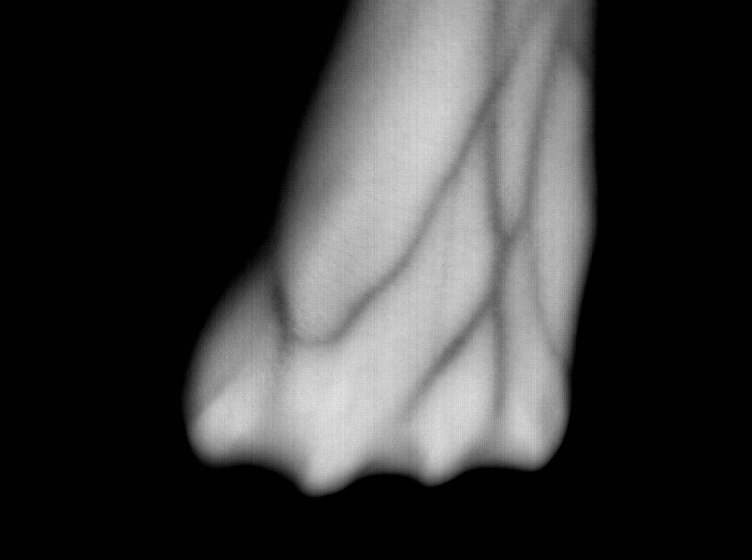

In [4]:
img = Image.open("Vein.png")
img = img.convert("L")
img

In [5]:
img = np.array(img)
img.min(),img.max()

(0, 231)

<BarContainer object of 256 artists>

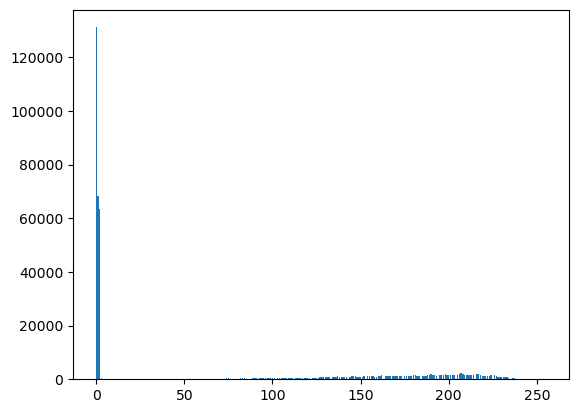

In [6]:
hist = np.histogram(img.flatten(),bins=256)
plt.bar(np.arange(256),hist[0])

## Histogram Based Thresholding

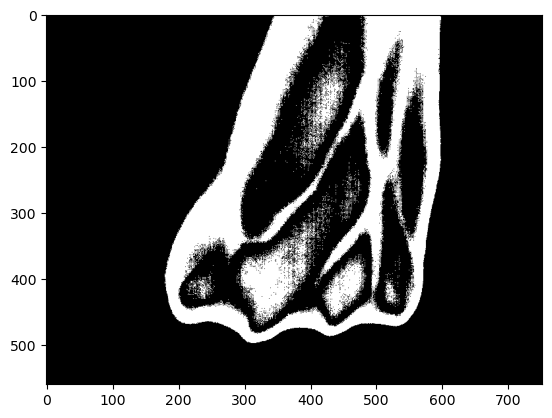

In [7]:
img = Image.open("Vein.png")
img = img.convert("L")
img = np.array(img)

mask = np.copy(img)

thresh = 2

mask[np.where((mask>=150) & (mask<=200))] = 0

mask[np.where(mask<=thresh)] = 0
mask[np.where(mask>thresh)] = 1

plt.imshow(mask,cmap='gray')

## Adaptive Thresholding

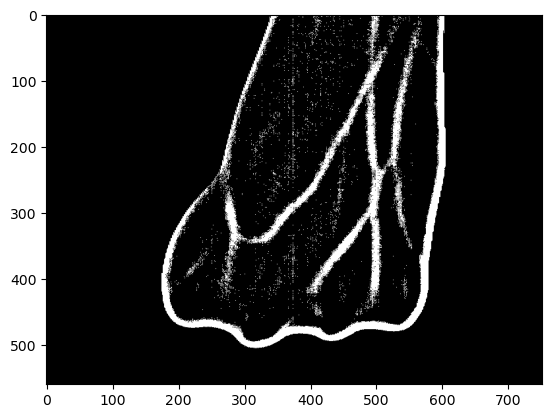

In [8]:
thresh = cv2.adaptiveThreshold(img, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 29, 9)
plt.imshow(thresh,cmap="gray")

## Watershed Thresholding

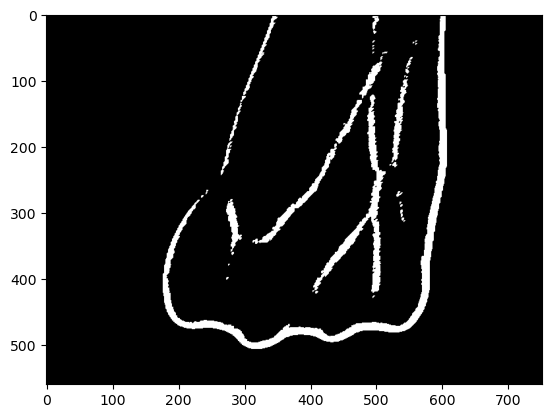

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(thresh,cmap="gray")

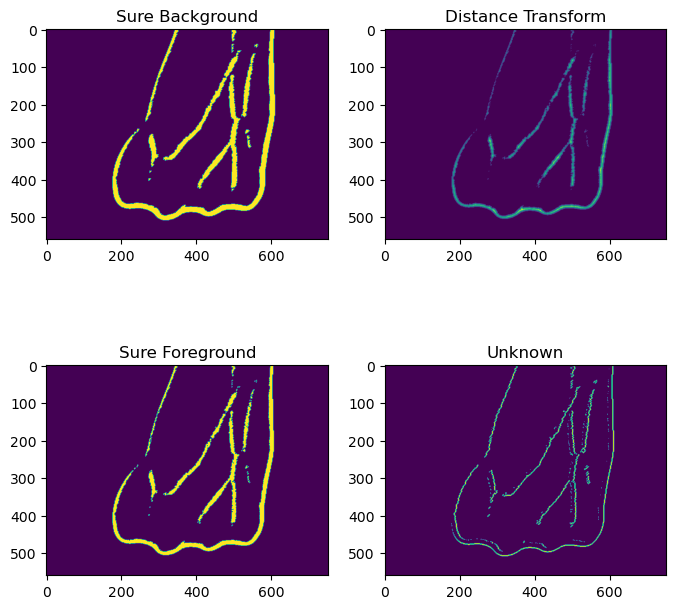

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(thresh, kernel, iterations=3)
ax[0, 0].imshow(sure_bg)
ax[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 3)
ax[0, 1].imshow(dist)
ax[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.01 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
ax[1, 0].imshow(sure_fg)
ax[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
ax[1, 1].imshow(unknown)
ax[1, 1].set_title('Unknown')

plt.show()

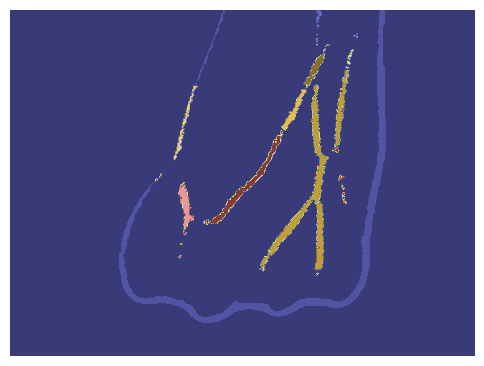

In [11]:
ret, markers = cv2.connectedComponents(sure_fg)

markers += 1
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

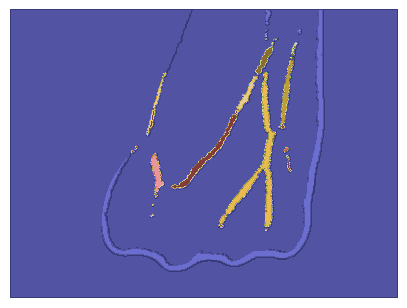

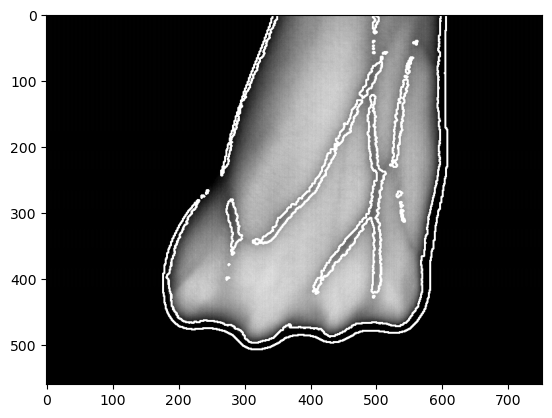

In [12]:
img = cv2.imread("Vein.png")

markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]:
  target = np.where(markers == label, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
  contours, hierarchy = cv2.findContours(
      target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
  )
  coins.append(contours[0])

# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(255, 255, 255), thickness=2)
plt.imshow(img)

## Erosion, Dilation, Opening, Closing and Generating Mask

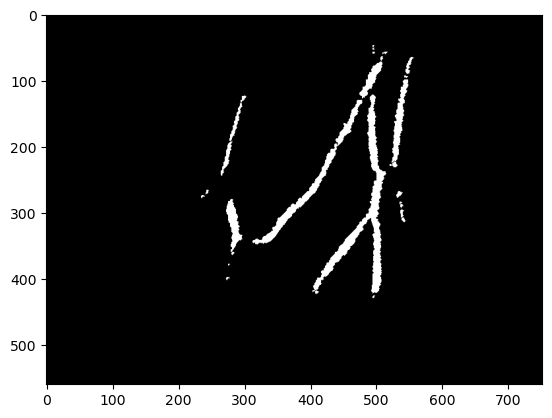

In [13]:
hehe = np.copy(markers)

hehe[np.where(hehe<10)] = 0
hehe[np.where(hehe>=10)] = 1

plt.imshow(hehe,cmap="gray")

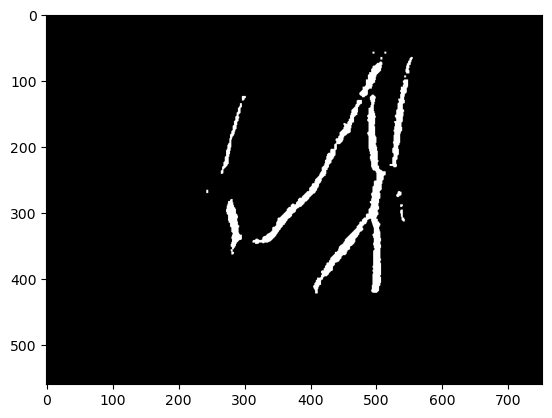

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
hehe = cv2.erode(hehe.astype(np.uint8),kernel,iterations=1)
hehe = cv2.dilate(hehe.astype(np.uint8),kernel,iterations=1)
hehe = cv2.morphologyEx(hehe, cv2.MORPH_CLOSE, kernel)
plt.imshow(hehe,cmap="gray")